In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

INPUT:
CSV file with the headers ("Chance_of_Attendance,Party_Size") on the first line.  Each line then contains two values separated by a comma.  The first value is the chance of that guest party attending the wedding.  The second number is the total number of people in that guest party (single, couple, family).

ASSUMPTIONS:
Either the whole party attends, or none of the party attends.

In [2]:
df = pd.read_csv('wedding_guests.csv')

num_simulations = 1000
sim_results = []

for i in range(num_simulations):
  df['Attending?'] = df.apply(lambda row: np.random.choice([1,0],p=[row.Chance_of_Attendance, 1-row.Chance_of_Attendance]),axis=1)

  df['Attending_Size'] = df['Party_Size'] * df['Attending?']

  sim_results.append([
  df['Attending?'].sum(),
  df['Attending_Size'].mean(),
  df['Attending_Size'].sum().round(0)])

  results_df = pd.DataFrame.from_records(sim_results, columns=['Parties Attending','Average Party Size','Total Attendees'])

In [3]:
total_invited = df['Party_Size'].sum()
sim_max = results_df['Total Attendees'].max()

print(f"Typically, wedding websites will tell you to expect 80% of your invitees to attend.  You have invited {total_invited} people to the wedding.  The 80% rule would tell you to expect {round(0.8*total_invited)} people.  The highest attendance count seen in {num_simulations} simulations was {sim_max} people.")

Typically, wedding websites will tell you to expect 80% of your invitees to attend.  You have invited 148 people to the wedding.  The 80% rule would tell you to expect 118 people.  The highest attendance count seen in 1000 simulations was 122 people.


In [4]:
results_df.describe().style.format(precision=2)

,Parties Attending,Average Party Size,Total Attendees
count,1000.00,1000.00,1000.00
mean,60.04,1.22,103.30
std,3.30,0.07,6.06
min,50.00,0.99,84.00
25%,58.00,1.16,99.00
50%,60.00,1.21,103.00
75%,62.00,1.26,107.00
max,70.00,1.44,122.00


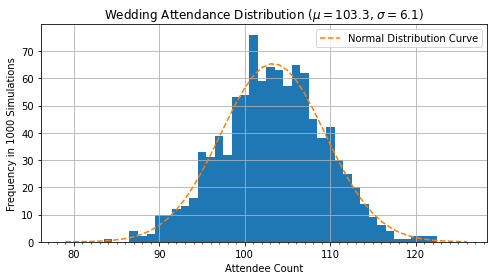

In [5]:
# ensure each bin is 1 person wide
bin_sizing = range(results_df['Total Attendees'].min()-5,results_df['Total Attendees'].max()+5,1)

# create initial histogram
ax = results_df['Total Attendees'].plot(kind='hist', bins=bin_sizing, align='left', figsize=(8,4))

# precalculate values for title and labels
sim_mean = results_df['Total Attendees'].mean().round(1)
sim_std = results_df['Total Attendees'].std().round(1)

# format and add info to the plot
ax.set_title(f'Wedding Attendance Distribution ($\mu=${sim_mean}, $\sigma=${sim_std})')
ax.set_xlabel('Attendee Count')
ax.set_ylabel(f'Frequency in {num_simulations} Simulations')
ax.xaxis.set_minor_locator(plt.ticker.MultipleLocator(1))
ax.grid(which='major', axis='both')

# calculate the normal distribution curve to show it fits
y = ((1 / (np.sqrt(2 * np.pi) * sim_std)) * np.exp(-0.5 * (1 / sim_std * (bin_sizing - sim_mean))**2))
ax.plot(bin_sizing, y*num_simulations, '--')
ax.legend(['Normal Distribution Curve'])
